# Dataset exploration

This section contains the code used in preprocessing and visualisation of the data. 

The Python scripts used in preprocessing and data clean up can be found in the Preprocessing folder! They are not included in the Jupyter notebook for the sake of organisation. 

The following preprocessing has been performed:
- in general = missing values cleaned, duplicate values removed

- links.csv = datatypes corrected, quotations added
- movies.csv = datatypes corrected, quotations added, data formatting corrected
- tags.csv = datatypes corrected, quotations added, timestamps removed
- ratings.csv = datatypes corrected, timestamps removed
- tmdb_movie_details = popularity column removed, datatypes corrected, quotations added, data formatting corrected

### Data Loading

In [29]:
import os
import pandas as pd
import numpy as np

data_dir = "Data/ml-latest-small"
movies_path = os.path.join(data_dir, "cleaned_movies.csv")
ratings_path = os.path.join(data_dir, "cleaned_ratings.csv")
tags_path = os.path.join(data_dir, "cleaned_tags.csv")
links_path = os.path.join(data_dir, "cleaned_links.csv")
tmdb_path = os.path.join(data_dir, "../TMDB-API/cleaned_tmdb_movie_details.csv")

Load the datasets into pandas DataFrames:

In [30]:
# Load the datasets into pandas DataFrames:
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path, usecols=['userId', 'movieId', 'rating']) # Discard timestamp column
tags = pd.read_csv(tags_path)
links = pd.read_csv(links_path)
tmdb = pd.read_csv(tmdb_path)

### Data Visualisation

We begin by exploring the dataset at a high level. Here we print the total number of movies, users, and ratings.

In [31]:

# Movies 
# Print total number of movies
print("Total number of movies: ", len(movies))

# Print total number of ratings and users
#load ratings column 1 as numpy array
ratings_array = ratings.iloc[:, 1].values
#extract last userId to get total number of users
total_users = ratings['userId'].max()
print(total_users ," users gave ", str(len(ratings)) , " ratings.")


Total number of movies:  9742
610  users gave  100836  ratings.


We now visualise each of the provided CSV files: movies, ratings, links, and tags! We begin with movies.csv

In [32]:
print("Movies DataFrame:")
movies.head()

Movies DataFrame:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Now, we peek into Links CSV!

In [33]:
print("Links DataFrame:")
links.head()

Links DataFrame:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


And now Ratings CSV:

In [34]:
print("Ratings DataFrame:")
ratings.head()

Ratings DataFrame:


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


And finally, Tags CSV!

In [35]:
print("Tags DataFrame:")
tags.head()

Tags DataFrame:


,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [36]:
print("TMDB API DataFrame:")
tmdb.head()


TMDB API DataFrame:


,movieId,release_date,overview,original_language,runtime,genres_tmdb
0,1,1995-11-22,"Led by Woody, Andy's toys live happily in his ...",en,81,Family|Comedy|Animation|Adventure
1,2,1995-12-15,When siblings Judy and Peter discover an encha...,en,104,Adventure|Fantasy|Family
2,3,1995-12-22,A family wedding reignites the ancient feud be...,en,101,Romance|Comedy
3,4,1995-12-22,"Cheated on, mistreated and stepped on, the wom...",en,127,Comedy|Drama|Romance
4,5,1995-12-08,Just when George Banks has recovered from his ...,en,106,Comedy|Family


### Plots and Graphs

Now that we have an overview of the format of the CSV files, we can visualise the data in neat graphs and plots. This will allow us to get an intuitive understanding of the nature of our data! At a high level, we try to make sense of the ratings, genres, tags, runtimes, and release dates.

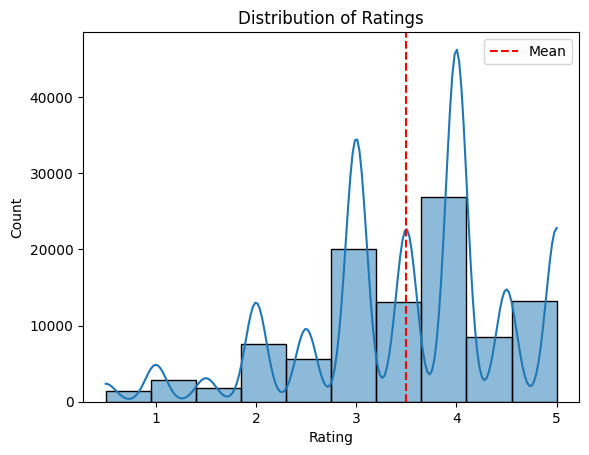

In [37]:
import matplotlib.pyplot as plt
from numpy import mean
import seaborn as sns

# Distribution of Ratings

# kernel density estimate (KDE) = a smoothed version of the histogram showing the distribution shape of the ratings! Shown for better idea
sns.histplot(ratings['rating'], bins=10, kde=True) 
plt.axvline(mean(ratings['rating']), color='r', linestyle='--', label='Mean')

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend()
plt.show()


Now we see a box and whisker plot of the ratings. We see outliers, a min value, lower quartile, median, upper quartile, and max value!

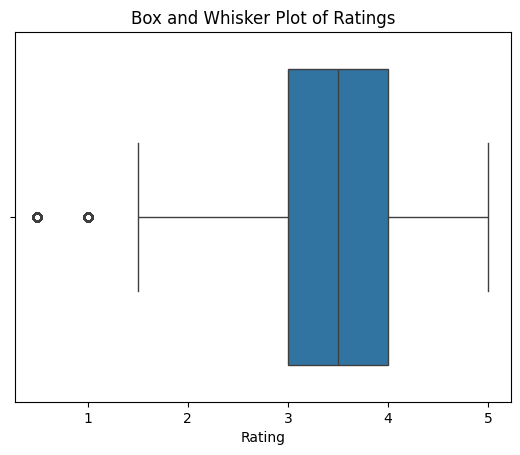

In [38]:
# box and whisker plot of ratings!

sns.boxplot(x=ratings['rating'])
plt.title("Box and Whisker Plot of Ratings")
plt.xlabel("Rating")
plt.show()

This plot is akin to a sparsity matrix. The blue dots represent a rating, and a blank space indicates no rating. This shows how uneven the ratings are in the dataset. This is to be expected. One user cannot rate 9000 movies, but nevertheless, it must be visualised!

C:\Users\Bruger\AppData\Local\Temp\ipykernel_55680\4072338574.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



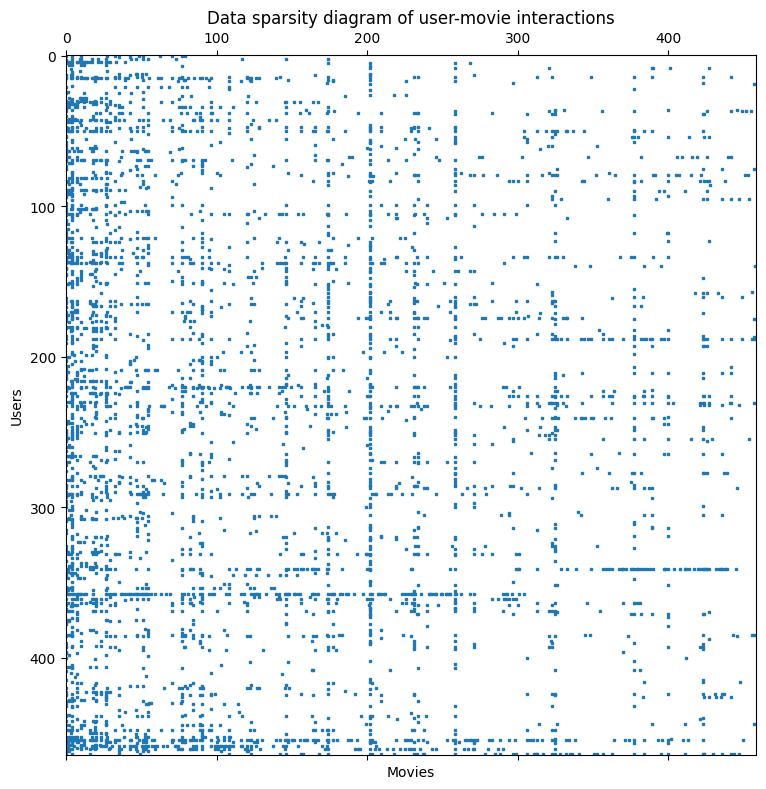

In [39]:
ratings = pd.read_csv("Data/ml-latest-small/ratings.csv")  
# columns: userId, movieId, rating, timestamp
N_USERS = 500
N_MOVIES = 500

unique_users = ratings["userId"].drop_duplicates().sample(N_USERS, random_state=42)
unique_movies = ratings["movieId"].drop_duplicates().sample(N_MOVIES, random_state=42)

sample = ratings[
    ratings["userId"].isin(unique_users) &
    ratings["movieId"].isin(unique_movies)
]

sample["interaction"] = 1  # any row means "user interacted with movie"

interaction_matrix = sample.pivot_table(
    index="userId",
    columns="movieId",
    values="interaction",
    fill_value=0
)
mat = interaction_matrix.values
plt.figure(figsize=(8, 8))
plt.spy(mat, markersize=2)
plt.xlabel("Movies")
plt.ylabel("Users")
plt.title("Data sparsity diagram of user-movie interactions")
plt.tight_layout()
plt.show()

Here, we visualise the top 10 most rated movies! Not super useful, but very insightful!

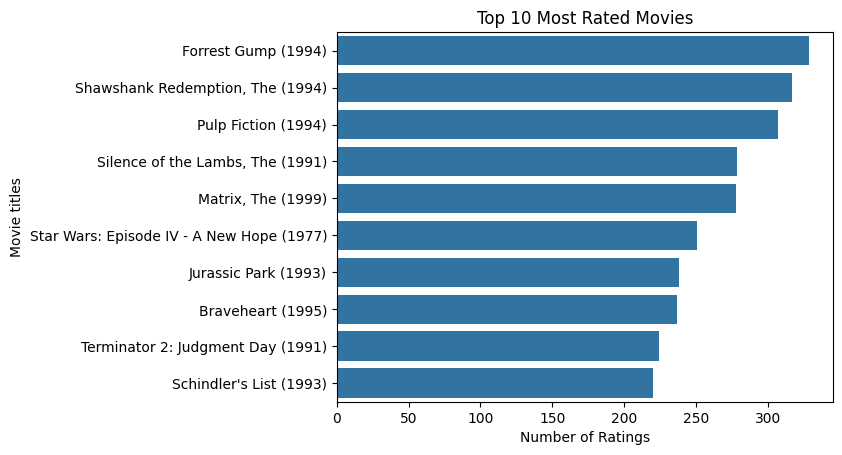

In [40]:
movie_ratings = ratings.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).reset_index()

movie_ratings = movie_ratings.merge(movies, on='movieId')

top_movies = movie_ratings.sort_values('num_ratings', ascending=False).head(10)

sns.barplot(y='title', x='num_ratings', data=top_movies)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie titles")
plt.show()

Next, we can the see the top 10 highest rated movies in our dataset. Not very useful, but super cool!

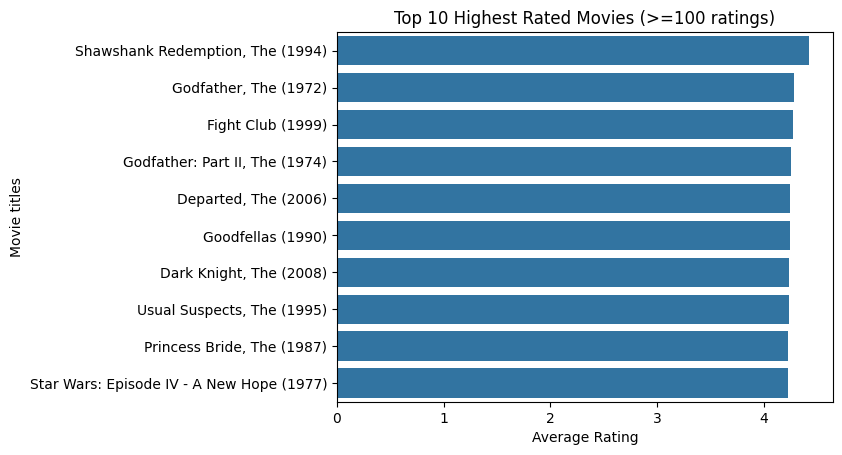

In [41]:
popular = movie_ratings[movie_ratings['num_ratings'] > 100]
top_rated = popular.sort_values('avg_rating', ascending=False).head(10)

sns.barplot(y='title', x='avg_rating', data=top_rated)
plt.title("Top 10 Highest Rated Movies (>=100 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie titles")
plt.show()


This visualisation is super important! It shows how many films have the specified genres. Clearly, Drama is magnitudes more than Film-Noir! This uneven representation of genres will affect our recommendation system!

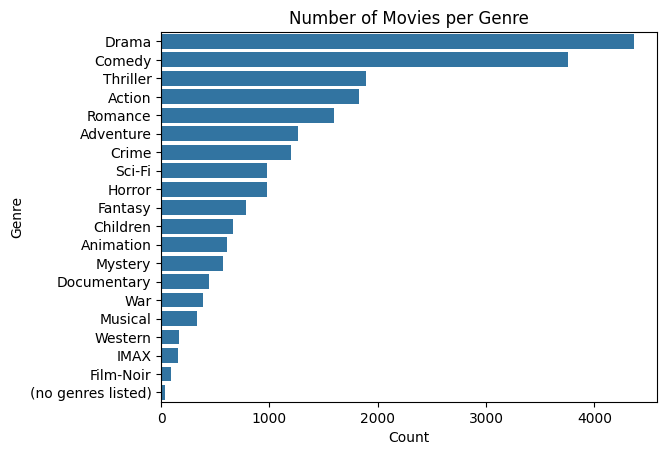

In [42]:
from collections import Counter

genre_counts = Counter(g for genres in movies['genres'] for g in genres.split('|'))
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

sns.barplot(y='Genre', x='Count', data=genre_df.sort_values('Count', ascending=False))
plt.title("Number of Movies per Genre")
plt.show()


This figure shows how each genre is rated in our dataset. Deeply interesting to see that the least represented genre is the highest rated on average!

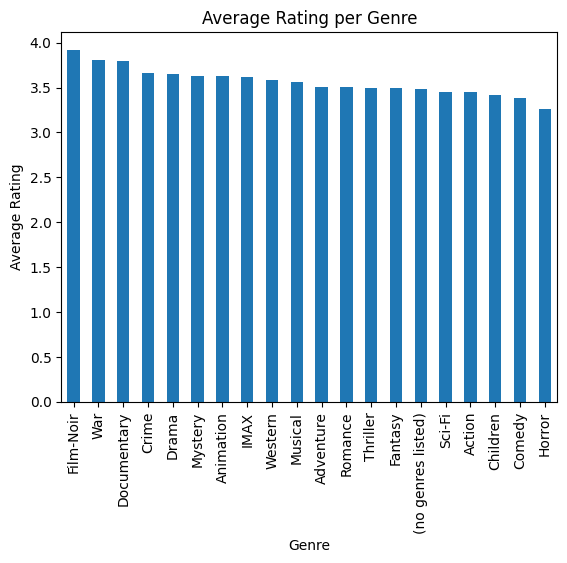

In [43]:
movie_genres = movies.assign(Genre=movies['genres'].str.split('|')).explode('Genre')
genre_ratings = ratings.merge(movie_genres, on='movieId')
avg_genre_rating = genre_ratings.groupby('Genre')['rating'].mean().sort_values(ascending=False)

avg_genre_rating.plot(kind='bar')
plt.title("Average Rating per Genre")
plt.ylabel("Average Rating")
plt.show()

This figure illustrates the user defined tags and shows which tags (out of thousands) was the most common. 

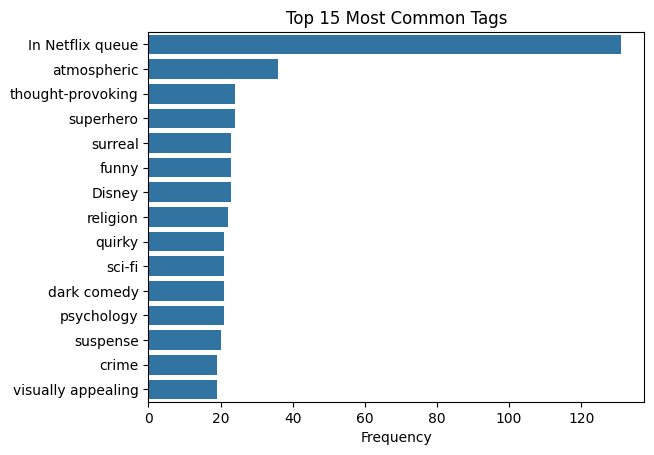

In [44]:
tag_counts = tags['tag'].value_counts().head(15)
sns.barplot(y=tag_counts.index, x=tag_counts.values)
plt.title("Top 15 Most Common Tags")
plt.xlabel("Frequency")
plt.ylabel("")
plt.show()

This histogram shows us the distribution of runtimes across all movies in the dataset. Very interesting to see most movies sticking around the standard length of 1 to 2 hours!

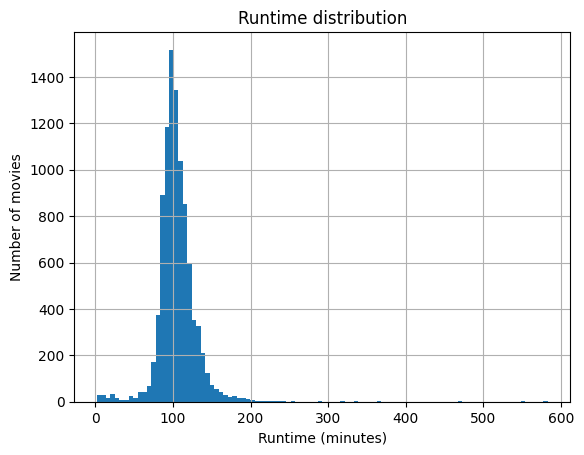

In [45]:
plt.figure()
tmdb["runtime"].hist(bins=100)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of movies")
plt.title("Runtime distribution")
plt.show()


And finally, we view the release (years) of the movies in a histogram. Very interesting to observe the skew of data towards the 2000s. This will naturally affect any recommendation system

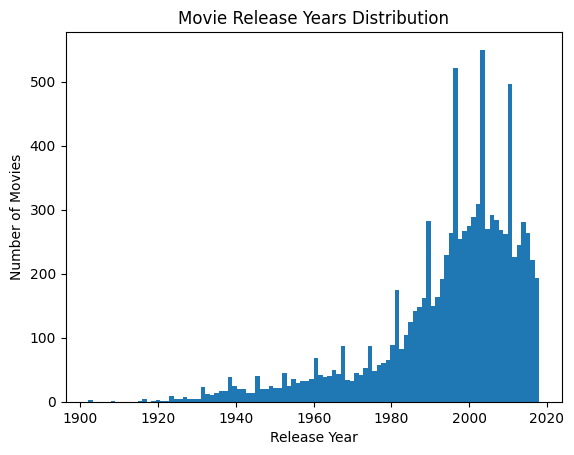

In [46]:
tmdb["release_date"] = pd.to_datetime(tmdb["release_date"], errors="coerce")

plt.hist(tmdb["release_date"].dt.year.dropna().astype(int), bins=100)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Movie Release Years Distribution")
plt.show()


# Apriori Algorithm

1. Generating the candidate 1-itemsets:

In [ ]:
# 1. Calculate Total Users (Transactions)
total_users = ratings['userId'].nunique()

# Filter ratings first: Keep only rows where rating >= MIN_RATING
MIN_RATING = 4.0      # Only consider ratings >= 4.0
high_ratings = ratings[ratings['rating'] >= MIN_RATING]

# 2. Calculate Frequency (Raw Support) for each movie
# Count how many unique users rated each movie
movie_frequency = high_ratings.groupby('movieId')['userId'].nunique().rename('frequency')

# 3. Calculate Relative Support
# Support = (Number of users who rated the movie) / (Total number of users)
movie_support = (movie_frequency / total_users).rename('support')

# 4. Merge results with movie titles for readability
support_df = pd.merge(movies[['movieId', 'title']], movie_frequency, on='movieId', how='left')
support_df = pd.merge(support_df, movie_support, left_on='movieId', right_index=True, how='left')

# Fill NaNs for movies with 0 ratings
support_df['frequency'] = support_df['frequency'].fillna(0).astype(int)
support_df['support'] = support_df['support'].fillna(0.0)

# Sort by support descending to see top movies
support_df_sorted = support_df.sort_values(by='support', ascending=False)

# Display results
print(f"Total number of unique users: {total_users}\n")
print("Top 10 Movies by Support:")
print(support_df_sorted[['title', 'frequency', 'support']].head(10))

# Based on support of the 1-item groups
MIN_SUPPORT = 0.05 # Minimum support threshold (5% of total users)

# Frequent 1-Itemsets (L1)
# Filter support_df for movies meeting min_support
L1_df_sorted = support_df_sorted[support_df_sorted['support'] >= MIN_SUPPORT]
L1_movie_ids = L1_df_sorted['movieId'].tolist()

print(f"Found {len(L1_movie_ids)} frequent 1-itemsets (movies with support >= {MIN_SUPPORT*100}%).\n")

Total number of unique users: 610

Top 10 Movies by Support:
                                                  title  frequency   support
277                    Shawshank Redemption, The (1994)        274  0.449180
314                                 Forrest Gump (1994)        249  0.408197
257                                 Pulp Fiction (1994)        244  0.400000
510                    Silence of the Lambs, The (1991)        225  0.368852
1939                                 Matrix, The (1999)        222  0.363934
224           Star Wars: Episode IV - A New Hope (1977)        201  0.329508
2226                                  Fight Club (1999)        179  0.293443
461                             Schindler's List (1993)        175  0.286885
898   Star Wars: Episode V - The Empire Strikes Back...        168  0.275410
97                                    Braveheart (1995)        166  0.272131
Found 353 frequent 1-itemsets (movies with support >= 5.0%).



2. Generate candidate 2-Itemsets:

In [ ]:
import itertools
from collections import defaultdict

# Generate Candidate 2-Itemsets (C2)
# Create all unique pairs from the frequent 1-itemsets
C2_candidates = list(itertools.combinations(L1_movie_ids, 2))
print(f"Generated {len(C2_candidates)} candidate 2-itemsets to check.\n")

# Count Support for Candidates
# Pre-process transactions for faster counting:
# Create a dictionary where keys are userIds and values are sets of movieIds they rated >= 4.0
user_transactions = high_ratings.groupby('userId')['movieId'].apply(set).to_dict()

# Initialize a counter for candidate pairs
candidate_counts = defaultdict(int)

# Count occurrences of each candidate pair in user transactions
for userId, rated_movies in user_transactions.items():
    for candidate in C2_candidates:
        # Check if both movies in the pair are in the user's rated movies
        if set(candidate).issubset(rated_movies):
            candidate_counts[candidate] += 1

# Filter to get Frequent 2-Itemsets (L2)
min_support_count = total_users * MIN_SUPPORT
L2_itemsets = []

for candidate, count in candidate_counts.items():
    if count >= min_support_count:
        support = count / total_users
        L2_itemsets.append({
            'movie_id_1': candidate[0],
            'movie_id_2': candidate[1],
            'frequency': count,
            'support': support
        })

# Convert to DataFrame for easy viewing and sorting
L2_df = pd.DataFrame(L2_itemsets)

# Merge with movie titles for readability
# Merge title for movie 1
L2_df = pd.merge(L2_df, movies[['movieId', 'title']], left_on='movie_id_1', right_on='movieId', how='left')
L2_df = L2_df.rename(columns={'title': 'movie_1_title'}).drop(columns='movieId')
# Merge title for movie 2
L2_df = pd.merge(L2_df, movies[['movieId', 'title']], left_on='movie_id_2', right_on='movieId', how='left')
L2_df = L2_df.rename(columns={'title': 'movie_2_title'}).drop(columns='movieId')

# Sort by support descending
L2_df_sorted = L2_df.sort_values(by='support', ascending=False)

print(f"Found {len(L2_df_sorted)} frequent 2-itemsets.\n")
print("Top 10 Frequent 2-Itemsets by Support:")
print(L2_df_sorted[['movie_1_title', 'movie_2_title', 'frequency', 'support']].head(10).to_string(index=False))

Generated 62128 candidate 2-itemsets to check.

Found 3703 frequent 2-itemsets.

Top 10 Frequent 2-Itemsets by Support:
                            movie_1_title                                         movie_2_title  frequency  support
         Shawshank Redemption, The (1994)                                   Forrest Gump (1994)        168 0.275410
         Shawshank Redemption, The (1994)                                   Pulp Fiction (1994)        158 0.259016
                      Pulp Fiction (1994)                      Silence of the Lambs, The (1991)        152 0.249180
Star Wars: Episode IV - A New Hope (1977) Star Wars: Episode V - The Empire Strikes Back (1980)        144 0.236066
         Shawshank Redemption, The (1994)                      Silence of the Lambs, The (1991)        140 0.229508
                      Forrest Gump (1994)                                   Pulp Fiction (1994)        136 0.222951
         Shawshank Redemption, The (1994)                           

3. Generate candidate 3-itemsets:

In [49]:
# Generate Candidate 3-Itemsets (C3)
L2_pairs = [sorted([item['movie_id_1'], item['movie_id_2']]) for item in L2_itemsets]
L2_pairs.sort()

# Convert to a set for fast lookup during pruning
L2_pairs_set = set(tuple(pair) for pair in L2_pairs)

C3_candidates = set()
for i in range(len(L2_pairs)):
    for j in range(i + 1, len(L2_pairs)):
        # Join step: If first items match ( [A, B] and [A, C] )
        if L2_pairs[i][0] == L2_pairs[j][0]:
            # Create candidate by union: {A, B, C}
            candidate = tuple(sorted(set(L2_pairs[i]) | set(L2_pairs[j])))

            # Prune step: Check if ALL size-2 subsets are frequent
            is_valid = True
            for subset in itertools.combinations(candidate, 2):
                if tuple(sorted(subset)) not in L2_pairs_set:
                    is_valid = False
                    break

            if is_valid:
                C3_candidates.add(candidate)
        else:
            # Since L2_pairs is sorted, if first items don't match anymore,
            # we can break the inner loop early for efficiency.
            break

# Convert back to list for the rest of your code
C3_candidates = list(C3_candidates)

print(f"Generated {len(C3_candidates)} candidate 3-itemsets to check.\n")

# Count Support for Candidates (C3)
# Initialize a counter for candidate triples
candidate_3_counts = defaultdict(int)

# Count occurrences of each candidate triple in user transactions
for userId, rated_movies in user_transactions.items():
    for candidate in C3_candidates:
        # Check if all 3 movies in the triple are in the user's rated movies
        if set(candidate).issubset(rated_movies):
            candidate_3_counts[candidate] += 1

# Filter to get Frequent 3-Itemsets (L3)
L3_itemsets = []

for candidate, count in candidate_3_counts.items():
    if count >= min_support_count:
        support = count / total_users
        L3_itemsets.append({
            'movie_id_1': candidate[0],
            'movie_id_2': candidate[1],
            'movie_id_3': candidate[2],
            'frequency': count,
            'support': support
        })

# Convert to DataFrame
L3_df = pd.DataFrame(L3_itemsets)

# Merge with movie titles for readability

# Merge title for movie 1
L3_df = pd.merge(L3_df, movies[['movieId', 'title']], left_on='movie_id_1', right_on='movieId', how='left')
L3_df = L3_df.rename(columns={'title': 'movie_1_title'}).drop(columns='movieId')

# Merge title for movie 2
L3_df = pd.merge(L3_df, movies[['movieId', 'title']], left_on='movie_id_2', right_on='movieId', how='left')
L3_df = L3_df.rename(columns={'title': 'movie_2_title'}).drop(columns='movieId')

# Merge title for movie 3
L3_df = pd.merge(L3_df, movies[['movieId', 'title']], left_on='movie_id_3', right_on='movieId', how='left')
L3_df = L3_df.rename(columns={'title': 'movie_3_title'}).drop(columns='movieId')

# Sort by support descending
L3_df_sorted = L3_df.sort_values(by='support', ascending=False)

print(f"Found {len(L3_df_sorted)} frequent 3-itemsets.\n")
print("Top 10 Frequent 3-Itemsets by Support:")
print(L3_df_sorted[['movie_1_title', 'movie_2_title', 'movie_3_title', 'frequency', 'support']].head(10).to_string(index=False))

Generated 47985 candidate 3-itemsets to check.

Found 10486 frequent 3-itemsets.

Top 10 Frequent 3-Itemsets by Support:
                                            movie_1_title                                         movie_2_title                                                                  movie_3_title  frequency  support
                                      Pulp Fiction (1994)                      Shawshank Redemption, The (1994)                                               Silence of the Lambs, The (1991)        108 0.177049
                Star Wars: Episode IV - A New Hope (1977) Star Wars: Episode V - The Empire Strikes Back (1980)                              Star Wars: Episode VI - Return of the Jedi (1983)        107 0.175410
                                      Pulp Fiction (1994)                      Shawshank Redemption, The (1994)                                                            Forrest Gump (1994)        106 0.173770
Lord of the Rings: The Fellowship o

4. Generate the Association Rules

In [ ]:
# Define Confidence Threshold
MIN_CONFIDENCE = 0.5
rules = []
# Use a set to track L2 pairs we've already processed, based on movie IDs:
processed_l2_pairs = set()

# Generate Rules from L2 (Pairs)
l1_support_dict = L1_df_sorted.set_index('movieId')['support'].to_dict()

for _, row in L2_df_sorted.iterrows():
    m1_id, m1_title = row['movie_id_1'], row['movie_1_title']
    m2_id, m2_title = row['movie_id_2'], row['movie_2_title']
    support_pair = row['support']
    
    # Create an identifier for the pair that ignores order
    pair_id = frozenset({m1_id, m2_id})
    
    # Skip if this pair has already been processed (which it shouldn't, but as a safeguard)
    if pair_id in processed_l2_pairs:
        continue
    
    # Calculate metrics for both possible L2 rules
    # Rule 1: {Movie 1} -> {Movie 2}
    conf_1_to_2 = support_pair / l1_support_dict[m1_id]
    lift_1_to_2 = conf_1_to_2 / l1_support_dict[m2_id]
    
    # Rule 2: {Movie 2} -> {Movie 1}
    conf_2_to_1 = support_pair / l1_support_dict[m2_id]
    # Lift is symmetric: lift_2_to_1 = conf_2_to_1 / l1_support_dict[m1_id] = lift_1_to_2
    
    
    # Decision: Select the rule to keep
    
    # Check if at least one rule meets the MIN_CONFIDENCE
    if conf_1_to_2 >= MIN_CONFIDENCE or conf_2_to_1 >= MIN_CONFIDENCE:
        
        # We prioritize the rule with the higher confidence
        if conf_1_to_2 >= conf_2_to_1 and conf_1_to_2 >= MIN_CONFIDENCE:
            # Keep Rule 1
            rules.append({
                'antecedents': [m1_title],
                'consequents': [m2_title],
                'support': support_pair,
                'confidence': conf_1_to_2,
                'lift': lift_1_to_2,
                'type': 'L2'
            })
        elif conf_2_to_1 >= MIN_CONFIDENCE:
            # Keep Rule 2 (or if conf_2_to_1 > conf_1_to_2, and meets minimum)
             rules.append({
                'antecedents': [m2_title],
                'consequents': [m1_title],
                'support': support_pair,
                'confidence': conf_2_to_1,
                'lift': lift_1_to_2, # Use the same lift value
                'type': 'L2'
            })
            
    processed_l2_pairs.add(pair_id)

# Generate Rules from L3 (Triplets)
l2_support_dict = {}
for _, row in L2_df.iterrows():
    pair = tuple(sorted([row['movie_id_1'], row['movie_id_2']]))
    l2_support_dict[pair] = row['support']

for _, row in L3_df_sorted.iterrows():
    ids = [row['movie_id_1'], row['movie_id_2'], row['movie_id_3']]
    titles = [row['movie_1_title'], row['movie_2_title'], row['movie_3_title']]
    support_triplet = row['support']

    for i in range(3):
        ant_indices = [j for j in range(3) if j != i]
        ant_ids = sorted([ids[k] for k in ant_indices])
        ant_titles = [titles[k] for k in ant_indices]
        
        cons_id = ids[i]
        cons_title = [titles[i]]

        ant_support = l2_support_dict.get(tuple(ant_ids))
        if ant_support:
            confidence = support_triplet / ant_support
            if confidence >= MIN_CONFIDENCE:
                lift = confidence / l1_support_dict[cons_id]
                rules.append({
                    'antecedents': ant_titles,
                    'consequents': cons_title,
                    'support': support_triplet,
                    'confidence': confidence,
                    'lift': lift,
                    'type': 'L3'
                })

# Display Results Sorted by Lift
rules_df = pd.DataFrame(rules)

# Sort by lift descending
rules_df_sorted_by_lift = rules_df.sort_values(by='lift', ascending=False)

print(f"Generated {len(rules_df)} unique L2 and all L3 rules with confidence >= {MIN_CONFIDENCE*100}%.\n")
print("Top 20 Rules by LIFT (Non-Redundant L2):")
print(rules_df_sorted_by_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'type']].head(20).to_string(index=False))

Generated 25156 unique L2 and all L3 rules with confidence >= 50.0%.

Top 20 Rules by LIFT (Non-Redundant L2):
                                                                               antecedents                                                                                      consequents  support  confidence     lift type
                                                                         [Hot Fuzz (2007)]                                                                       [Shaun of the Dead (2004)] 0.052459    0.761905 8.769093   L2
                                          [Harry Potter and the Chamber of Secrets (2002)] [Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)] 0.062295    0.791667 8.326149   L2
                                                                     [Spider-Man 2 (2004)]                                                                              [Spider-Man (2002)] 0.052459    0.780488 8.069450   

# K-Means Clustering

Create a movie corpus for each movie:

In [51]:
# BUILD METADATA :)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assumes `movies` and `tags` DataFrames are already loaded

# Process Genres (MovieLens)
movies['genres_str'] = movies['genres'].str.replace('|', ' ')

# Process Tags (MovieLens)
tags['tag'] = tags['tag'].astype(str)
movie_tags = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# Initial Merge
metadata = pd.merge(movies, movie_tags, on='movieId', how='left')
metadata['tag'] = metadata['tag'].fillna('')

# Load & Process TMDB Metadata
tmdb_path = r"Data/TMDB-API/tmdb_movie_details.csv"
try:
    tmdb_data = pd.read_csv(tmdb_path)
    
    # Ensure 'movieId' is the same type for merging
    metadata['movieId'] = metadata['movieId'].astype(int)
    tmdb_data['movieId'] = tmdb_data['movieId'].astype(int)

    metadata = pd.merge(
        metadata,
        tmdb_data[['movieId', 'overview', 'genres_tmdb', 'release_date']],
        on='movieId',
        how='left'
    )

    metadata['overview'] = metadata['overview'].fillna('')
    metadata['genres_tmdb'] = metadata['genres_tmdb'].fillna('')

    print("TMDB metadata merged successfully.")

except FileNotFoundError:
    print(f"Error: File not found at {tmdb_path}. Please check the path.")
    metadata['overview'] = ''
    metadata['genres_tmdb'] = ''

# Create RICH Content String
metadata['content'] = (
    metadata['genres_str'] + ' ' +
    metadata['tag'] + ' ' +
    metadata['genres_tmdb'] + ' ' +
    metadata['overview']
)

metadata['content'] = (
    metadata['content']
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .fillna('')
)

print("\nExample extended content data:")
print(metadata['content'].head())

TMDB metadata merged successfully.

Example extended content data:
0    Adventure Animation Children Comedy Fantasy pi...
1    Adventure Children Fantasy fantasy magic board...
2    Comedy Romance moldy old Romance,Comedy A fami...
3    Comedy Drama Romance Comedy,Drama,Romance Chea...
4    Comedy pregnancy remake Comedy,Family Just whe...
Name: content, dtype: object


In [52]:
# TF-IDF + FINAL K-MEANS (k=11) which was found later - basically just edited after we found optimal solution:)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF with L2 normalization (good for K-Means on text)
tfidf = TfidfVectorizer(stop_words='english', norm='l2')
tfidf_matrix = tfidf.fit_transform(metadata['content'])

print(f"\nTF-IDF Matrix Shape: {tfidf_matrix.shape}")

# Best k from silhouette analysis
NUM_CLUSTERS = 11

kmeans = KMeans(
    n_clusters=NUM_CLUSTERS,
    random_state=42,
    n_init=10
)

metadata['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Quick sanity check: sample titles per cluster
for i in range(NUM_CLUSTERS):
    print(f"\n--- Cluster {i} ---")
    print(metadata[metadata['cluster'] == i]['title'].sample(5, replace=True).values)



TF-IDF Matrix Shape: (9742, 28557)

--- Cluster 0 ---
['Carrie (2013)' 'My Bloody Valentine 3-D (2009)' 'Silent Hill (2006)'
 'Texas Chainsaw Massacre, The (2003)' 'Saw IV (2007)']

--- Cluster 1 ---
['Hatari! (1962)' 'Supergirl (1984)'
 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)'
 'Gods of Egypt (2016)' 'Black Panther (2017)']

--- Cluster 2 ---
['Encino Man (1992)' 'Son of the Bride (Hijo de la novia, El) (2001)'
 "Who's That Girl? (1987)" 'La cravate (1957)' 'Bounty Hunter, The (2010)']

--- Cluster 3 ---
['Bride of Frankenstein, The (Bride of Frankenstein) (1935)'
 'Star Wars: The Clone Wars (2008)' 'Explorers (1985)' 'Sharknado (2013)'
 'Hulk (2003)']

--- Cluster 4 ---
['Pawn (2013)' 'Precious Cargo (2016)' 'Stranger in the House (1997)'
 'Pelican Brief, The (1993)' 'Harder They Come, The (1973)']

--- Cluster 5 ---
['One-Eyed Jacks (1961)' 'Claim, The (2000)' 'Shanghai Noon (2000)'
 'Lonesome Dove (1989)' 'I Shot Jesse James (1949)']

--- Cluster 6 ---
['Ge

Fitting KMeans for k = 2 ...
Fitting KMeans for k = 3 ...
Fitting KMeans for k = 4 ...
Fitting KMeans for k = 5 ...
Fitting KMeans for k = 6 ...
Fitting KMeans for k = 7 ...
Fitting KMeans for k = 8 ...
Fitting KMeans for k = 9 ...
Fitting KMeans for k = 10 ...
Fitting KMeans for k = 11 ...
Fitting KMeans for k = 12 ...
Fitting KMeans for k = 13 ...
Fitting KMeans for k = 14 ...
Fitting KMeans for k = 15 ...
Fitting KMeans for k = 16 ...
Fitting KMeans for k = 17 ...
Fitting KMeans for k = 18 ...
Fitting KMeans for k = 19 ...
Fitting KMeans for k = 20 ...


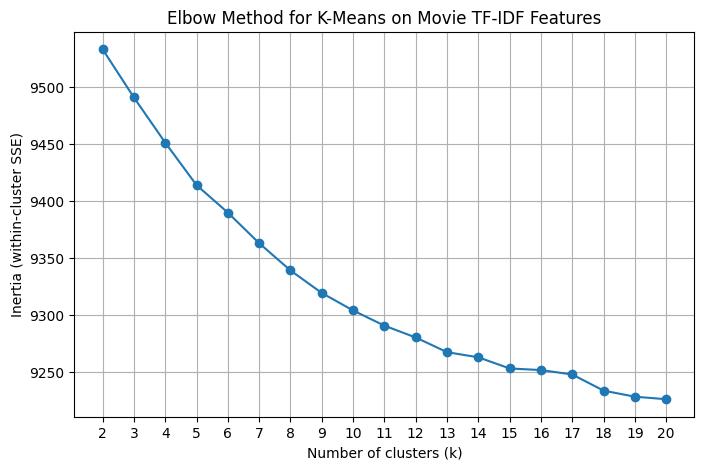

In [53]:
# ELBOW METHOD (to b able to see how many clusters is optimal for the k-means)

import matplotlib.pyplot as plt

K_RANGE = range(2, 21)
inertias = []

for k in K_RANGE:
    print(f"Fitting KMeans for k = {k} ...")
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(tfidf_matrix)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(K_RANGE), inertias, marker='o')
plt.xticks(list(K_RANGE))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method for K-Means on Movie TF-IDF Features")
plt.grid(True)
plt.show()


Computing silhouette score for k = 2 ...
Computing silhouette score for k = 3 ...
Computing silhouette score for k = 4 ...
Computing silhouette score for k = 5 ...
Computing silhouette score for k = 6 ...
Computing silhouette score for k = 7 ...
Computing silhouette score for k = 8 ...
Computing silhouette score for k = 9 ...
Computing silhouette score for k = 10 ...
Computing silhouette score for k = 11 ...
Computing silhouette score for k = 12 ...
Computing silhouette score for k = 13 ...
Computing silhouette score for k = 14 ...
Computing silhouette score for k = 15 ...
Computing silhouette score for k = 16 ...
Computing silhouette score for k = 17 ...
Computing silhouette score for k = 18 ...
Computing silhouette score for k = 19 ...
Computing silhouette score for k = 20 ...


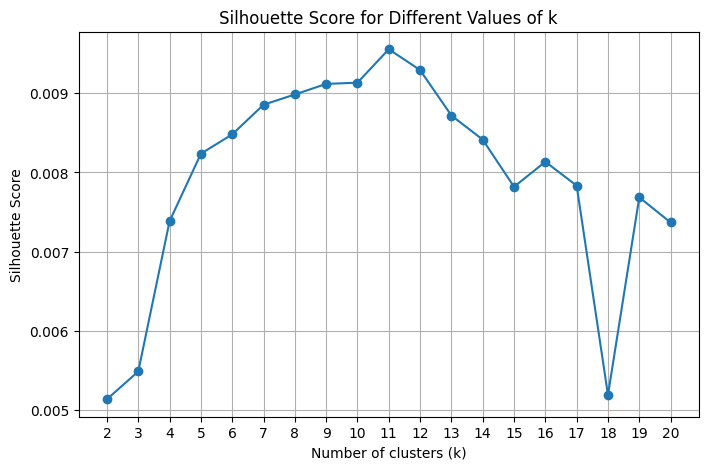

In [54]:
# SILHOUETTE SCORES (since the elbow plot was unclear, this should give us smth more quantifiable)

from sklearn.metrics import silhouette_score

K_RANGE = range(2, 21)
silhouette_scores = []

for k in K_RANGE:
    print(f"Computing silhouette score for k = {k} ...")
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(list(K_RANGE), silhouette_scores, marker='o')
plt.xticks(list(K_RANGE))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Values of k")
plt.grid(True)
plt.show()

# We found the best k = 11 from this plot


In [55]:
# PCA + PLOTLY VISUALIZATION (we found that k = 11 had the highest peak in the silhouette score plot)

import plotly.express as px
from sklearn.decomposition import PCA

metadata_aligned = metadata.reset_index(drop=True)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(tfidf_matrix.toarray())

pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['cluster'] = metadata_aligned['cluster'].astype(str)
pca_df['title']   = metadata_aligned['title']
pca_df['genres']  = metadata_aligned['genres']

fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='cluster',
    hover_data=['title', 'genres'],
    title=f'K-Means Clustering (k={NUM_CLUSTERS}) visualized with PCA',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    opacity=0.6
)

pc1_variance = pca.explained_variance_ratio_[0] * 100
pc2_variance = pca.explained_variance_ratio_[1] * 100

fig.update_layout(
    xaxis_title=f"Principal Component 1 ({pc1_variance:.2f}%)",
    yaxis_title=f"Principal Component 2 ({pc2_variance:.2f}%)",
    height=700
)

fig.show()


In [56]:
# CHECK CLUSTERS (what is really happening and how are the clusters sorted?) prolly in appendix

metadata.to_csv("metadata_export.csv", index=False)
